# Final Notebook
## Neighborhoods ranked by crime
by Christopher Troina and Yassir Abdalla

We decided to use crime as a way to mesure the quality of our neighborhoods. We wanted to have wide judgement, so we chose three different accounts of the crimes in each neighborhood.

# Arrest Data
Christopher Troina

This section mostly exists to clean up the data visually. It gets rid of the first few rows to just show the important bits like the time of crime, what the crime is, and most importantly, the neighborhood of the crime. The more important part is to get rid of data that is outside of Pittsburgh. I found that the "Mt. Oliver Boro" is different than the Mt Oliver neighborhood in Pittsburgh. Many neighborhoods are listed twice, so I merged them as well.

In [8]:
import pandas as pd
arrest=pd.read_csv("Arrest Data.csv")
del arrest["AGE"]
del arrest["GENDER"]
del arrest["RACE"]
del arrest["PK"]
del arrest["CCR"]
query_mask=arrest["INCIDENTLOCATION"].str.contains("(?i)Pittsburgh")
arrest=arrest[query_mask]
arrest = arrest[arrest.INCIDENTNEIGHBORHOOD != "Outside State"]
arrest = arrest[arrest.INCIDENTNEIGHBORHOOD != "Outside County"]
arrest = arrest[arrest.INCIDENTNEIGHBORHOOD != "Outside City"]
arrest = arrest[arrest.INCIDENTNEIGHBORHOOD != "Mt. Oliver Boro"]
arrest.dropna(subset=["INCIDENTNEIGHBORHOOD"], inplace=True)
arrest["INCIDENTNEIGHBORHOOD"]=arrest["INCIDENTNEIGHBORHOOD"].replace("Golden Triangle/Civic Arena", "Central Business District")
arrest["INCIDENTNEIGHBORHOOD"]=arrest["INCIDENTNEIGHBORHOOD"].replace("Mt. Oliver Neighborhood", "Mount Oliver")
arrest["INCIDENTNEIGHBORHOOD"]=arrest["INCIDENTNEIGHBORHOOD"].replace("Troy Hill-Herrs Island", "Troy Hill")
arrest["INCIDENTNEIGHBORHOOD"]=arrest["INCIDENTNEIGHBORHOOD"].replace("Central North Side", "Central Northside")
arrest.sample(100)

,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
1715,2016-10-02T14:00:00,"10 Block Silver Lake DR Pittsburgh, PA 15206","601.11(a) Littering and Dumping; Any waste, da...","10 Block Silver Lake DR Pittsburgh, PA 15206",Homewood West,5,1207.0,9.0,2.0,-79.903490,40.460711
44188,2020-10-06T02:03:00,"5th AV & Wilkins AV Pittsburgh, PA 15232",3112 Traffic-Control Signals. / 3714 Careless ...,"5th AV & Wilkins AV Pittsburgh, PA 15232",Shadyside,4,703.0,8.0,3.0,-79.937295,40.447800
15542,2017-12-04T11:00:00,"600 Block 1ST AV PITTSBURGH, PA 15219",13(a)(31) Marijuana: Possession Small Amount,"100 Block PARKFIELD AV PITTSBURGH, PA 15210",Carrick,3,2904.0,4.0,3.0,-79.987341,40.391252
53296,2022-01-03T21:20:00,"2600 Block Village RD Pittsburgh, PA 15205","2701(a)(1) Simple Assault - Intent., Know., Re...","2600 Block Village RD Pittsburgh, PA 15205",Fairywood,6,2808.0,2.0,5.0,-80.076811,40.448908
35416,2019-10-07T17:30:00,"2500 Block Hazelton ST Pittsburgh, PA 15214",2701 Simple Assault. / 3921(a) Theft by Unlawf...,"2500 Block Hazelton ST Pittsburgh, PA 15214",Perry South,1,2614.0,6.0,1.0,-80.006579,40.469949
...,...,...,...,...,...,...,...,...,...,...,...
27231,2019-01-04T14:23:00,"1400 Block Spring Garden AV Pittsburgh, PA 15212",9501 Bench Warrant,"1400 Block Spring Garden AV Pittsburgh, PA 15212",Spring Garden,1,2412.0,1.0,1.0,-79.987610,40.461798
18108,2018-03-04T01:12:00,"4500 Block Butler ST Pittsburgh, PA 15201",2701 Simple Assault. / 2706 Terroristic Threat...,"4500 Block Butler ST Pittsburgh, PA 15201",Central Lawrenceville,2,901.0,7.0,2.0,-79.959003,40.472097
12663,2017-09-05T14:45:00,"1700 Block E Carson ST Pittsburgh, PA 15203",9501 Bench Warrant,"1700 Block E Carson ST Pittsburgh, PA 15203",South Side Flats,3,1702.0,3.0,3.0,-79.981869,40.428585
21971,2018-07-13T08:22:00,"700 Block Hampshire AV Pittsburgh, PA 15216",9015 Failure To Appear/Arrest on Attachment Order,"700 Block Hampshire AV Pittsburgh, PA 15216",Beechview,6,1916.0,NaN,NaN,0.000000,0.000000


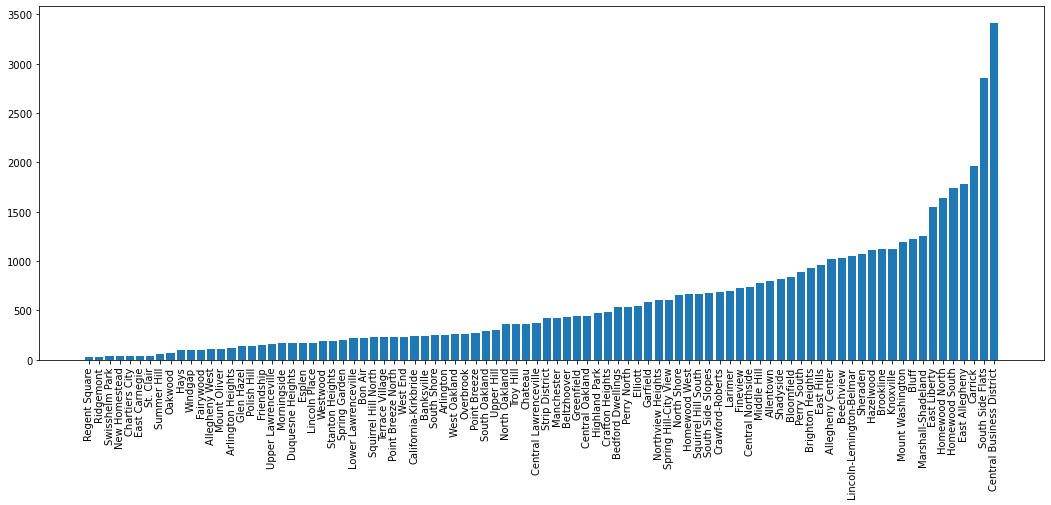

In [9]:
import operator
import matplotlib.pyplot as plt
d=dict()
locations=arrest["INCIDENTNEIGHBORHOOD"].values.tolist()
for x in range(len(locations)):
    if locations[x] in d.keys():
        d[locations[x]]=d[locations[x]]+1
    else:
        d[locations[x]]=1
dsort=sorted(d.items(), key=operator.itemgetter(1))
names, data = zip(*dsort)
plt.figure(figsize=(18,6.5))
plt.bar(names, data)
plt.xticks(rotation=90)
plt.show()

There is a large disparity between the highest and the lowest neighborhoods. Many of the lower ones are close together, but we decided to take the top 3 and bottom 3 for simplicity. 

We found the top 3 neighborhoods are: 
* Regent Square
* Ridgemont
* Swisshelm Park

We found the bottom 3 neighborhoods are:
* Central Business District
* South Side Flats
* Carrick

# Police Incident Blotter
Yassir Abdalla

This dataset is much cleaner than the last one, so only a few rows and outside Pittsburgh neighborhoods to remove. 

In [10]:
plotter=pd.read_csv("IncidentPlotter.csv")
del plotter["PK"]
del plotter["CCR"]
del plotter["HIERARCHY"]
query_mask= plotter["INCIDENTLOCATION"].str.contains("(?i)Pittsburgh")
plotter.dropna(subset=["INCIDENTNEIGHBORHOOD"],inplace=True)
plotter = plotter[plotter.INCIDENTNEIGHBORHOOD != "Outside State"]
plotter = plotter[plotter.INCIDENTNEIGHBORHOOD != "Outside County"]
plotter = plotter[plotter.INCIDENTNEIGHBORHOOD != "Outside City"]
plotter = plotter[plotter.INCIDENTNEIGHBORHOOD != "Mt. Oliver Boro"]

plotter.sample(100)

,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
2368,2022-04-15T23:09:00,"3700 Block Hiawatha St Pittsburgh, PA 15212",N,Brighton Heights,1,AIDED CASE,9497 Aided Case,2701.0,1.0,1.0,-80.045204,40.481122
1511,2022-04-13T01:58:00,"Murray Ave & Forward Ave Pittsburgh, PA 15217",Y,Squirrel Hill South,4,DUI - GENERAL IMPAIRMENT,3802(a)(1) DUI - General Impairment / 1543 Dri...,1414.0,5.0,3.0,-79.923489,40.429746
371,2022-04-13T03:55:00,"Arcola Way Pittsburgh, PA 15212",Y,Spring Garden,1,99,9998 Overdose Other,2412.0,1.0,1.0,-79.991793,40.460729
574,2022-04-09T12:25:00,"600 Block Smithfield St Pittsburgh, PA 15222",N,Central Business District,2,THEFT,3921 Theft by Unlawful Taking or Disposition.,201.0,6.0,6.0,-79.997409,40.441533
2779,2022-03-29T10:30:00,"2700 Block West Liberty Ave Pittsburgh, PA 15226",N,Brookline,6,CRIM MISCHIEF,3304 Criminal Mischief.,1919.0,7.0,6.0,-79.975618,40.454856
...,...,...,...,...,...,...,...,...,...,...,...,...
2118,2022-04-11T08:00:00,"700 Block Junilla St Pittsburgh, PA 15219",N,Bedford Dwellings,2,CRIM MISCHIEF,3304 Criminal Mischief.,509.0,6.0,3.0,-79.972530,40.449656
477,2022-04-02T17:30:00,"1300 Block Breed St Pittsburgh, PA 15203",Y,South Side Flats,3,DUI - GENERAL IMPAIRMENT,3745 Accidents Involving Damage to Unattended ...,1702.0,3.0,3.0,-79.984750,40.426005
2083,2022-04-11T13:30:00,"5100 Block Langhorn St Pittsburgh, PA 15207",N,Hazelwood,4,THEFT FROM AUTO,3921(a) Theft by Unlawful Taking or Dispositio...,1501.0,5.0,3.0,-79.947797,40.406554
1663,2022-04-10T02:00:00,"600 Block 1st Ave Pittsburgh, PA 15219",Y,Crafton Heights,6,TERRORISTIC THREATS,2706 Terroristic Threats. / 2709(a)(1) Harassm...,2814.0,6.0,6.0,-79.996041,40.435040


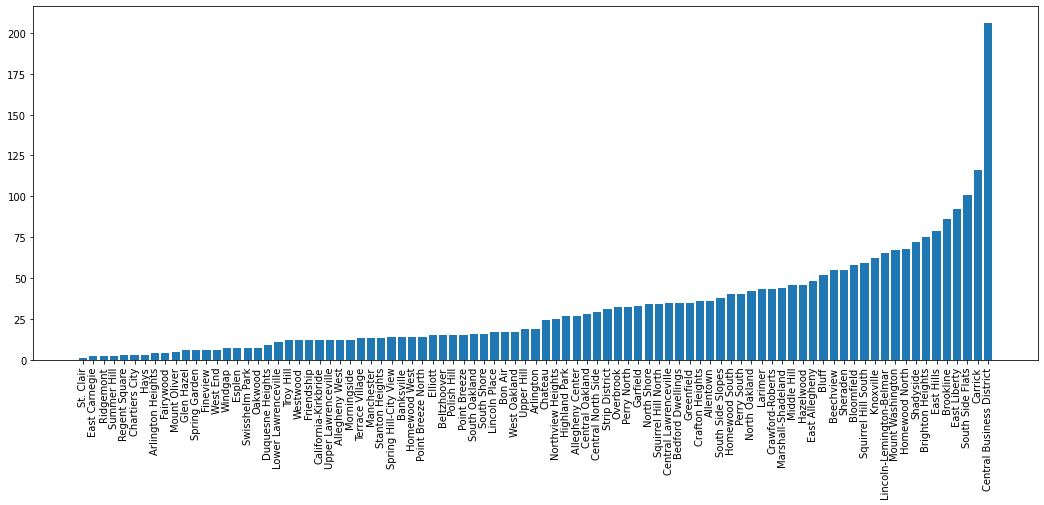

In [11]:
d=dict()
villian=plotter["INCIDENTNEIGHBORHOOD"].values.tolist()
for x in range(len(villian)):
    if villian[x] in d.keys():
        d[villian[x]]=d[villian[x]]+1
    else:
        d[villian[x]]=1
dsort=sorted(d.items(), key=operator.itemgetter(1))
names, data = zip(*dsort)
plt.figure(figsize=(18,6.5))
plt.bar(names, data)
plt.xticks(rotation=90)
plt.show()

There is relitively smooth curve with the exception of the Central Business District. The left few neighborhoods have a similar ammont of incidents blotted.

BEST 3 Neighborhoods ACCORDING TO THE METRIC:
* St. Clair
* East Carnegie
* Ridgemont

WORST 3 Neighborhoods ACCORDING TO THE METRIC:

* Central Buisness District
* Carrick
* South Side Flats

# Non-Traffic Citations
Christopher Troina

We decided to choose this dataset because despite only giving more minor crime, we thought it was important to include all aspects of crime to get the best picture of the neighborhoods.

In [12]:
cite=pd.read_csv("Citations.csv")
del cite["AGE"]
del cite["GENDER"]
del cite["RACE"]
del cite["PK"]
del cite["CCR"]
query_mask=cite["INCIDENTLOCATION"].str.contains("(?i)Pittsburgh")
cite=cite[query_mask]
cite = cite[cite.NEIGHBORHOOD != "Outside State"]
cite = cite[cite.NEIGHBORHOOD != "Outside County"]
cite = cite[cite.NEIGHBORHOOD != "Outside City"]
cite = cite[cite.NEIGHBORHOOD != "Mt. Oliver Boro"]
cite.dropna(subset=["NEIGHBORHOOD"], inplace=True)
cite["NEIGHBORHOOD"]=cite["NEIGHBORHOOD"].replace("Golden Triangle/Civic Arena", "Central Business District")
cite["NEIGHBORHOOD"]=cite["NEIGHBORHOOD"].replace("Mt. Oliver Neighborhood", "Mount Oliver")
cite["NEIGHBORHOOD"]=cite["NEIGHBORHOOD"].replace("Troy Hill-Herrs Island", "Troy Hill")
cite["NEIGHBORHOOD"]=cite["NEIGHBORHOOD"].replace("Central North Side", "Central Northside")
cite.sample(100)

,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
12008,2021-08-12T17:09:00,"800 Block LILAC ST PITTSBURGH, PA",2709(a)(3) Harassment No Legitimate Purpose,Greenfield,4,1517,5.0,3.0,-79.935356,40.424931
2774,2017-07-07T00:50:00,"S 17TH ST & E CARRIE WY PITTSBURGH, PA",601.16(b)(1)(a) Any Person who urinates or def...,South Side Flats,3,1702,NaN,NaN,0.000000,0.000000
155,2016-08-27T01:03:00,"300 Block N DITHRIDGE ST PITTSBURGH, PA","601.04 (c) (2) Loudspeakers, etc 0700-2200 >75...",North Oakland,4,507,6.0,3.0,-79.953846,40.451701
5379,2018-06-22T02:10:00,"1500 Block E CARSON ST PITTSBURGH, PA",5505 Public Drunkenness,South Side Flats,3,1702,3.0,3.0,-79.983310,40.428693
1831,2017-02-03T01:27:00,"E CARSON ST & S 14TH ST PITTSBURGH, PA",601.08 (a) Open Container Law,South Side Flats,3,1702,3.0,3.0,-79.984146,40.428799
...,...,...,...,...,...,...,...,...,...,...
1384,2017-02-18T00:25:00,"1500 Block E CARSON ST PITTSBURGH, PA",5505 Public Drunkenness,South Side Flats,3,1702,3.0,3.0,-79.983307,40.428685
10362,2020-07-20T16:38:00,"100 Block HERNDON ST PITTSBURGH, PA","2709(a)(1) Harassment by Physical Contact, or ...",Elliott,6,2020,2.0,5.0,-80.037688,40.442345
190,2016-09-10T01:00:00,"1500 Block BRIGHTON PL PITTSBURGH, PA",5503(a)(4) DISORDERLY CONDUCT - HAZARDOUS/PHYS...,California-Kirkbride,1,2507,6.0,1.0,-80.016516,40.456515
10574,2020-09-16T18:10:00,"6TH AV & LIBERTY AV PITTSBURGH, PA","2709(a)(1) Harassment by Physical Contact, or ...",Central Business District,2,201,6.0,6.0,-80.000231,40.442341


In [ ]:
dcite=dict()
neighs=cite["NEIGHBORHOOD"].values.tolist()
for x in range(len(neighs)):
    if neighs[x] in dcite.keys():
        dcite[neighs[x]]=dcite[neighs[x]]+1
    else:
        dcite[neighs[x]]=1
dcsort=sorted(dcite.items(), key=operator.itemgetter(1))
name2, data2 = zip(*dcsort)
plt.figure(figsize=(18,6.5))
plt.bar(name2, data2)
plt.xticks(rotation=90)
plt.show()

With the exception of the top neighborhood, there were many less incidents in this one compared to the other datasets. 

We found the top 3 neighborhoods were: 
* Rigemont
* Chartiers City
* St. Claire

We found the bottom 3 neighborhoods were:
* South Side Flats
* Central Business District
* Central Oakland

# Conclusion
We found that the best neighborhood according to the data was Ridgemont, as it was the only neighborhood that was in the top 3 of all of the datasets. We felt that because many of the lists had similar results, that puting them on some sort of scale wouldn't lead to significantly different results. We were originally thinking of including population, but we decided that overall crime was more important. 